In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
from matplotlib.figure import Figure
import plotly.graph_objects as go
from scipy.optimize import minimize
import os

## **Taller 2.**

## **En el segundo paso importamos desde yahoo finance la data de los activos que seleccionemos.**

In [6]:
ticker = ['ICLN', 'GLD', 'SUAS.L', 'EFA', 'HYG', 'VNQ', 'IVV']
price_data = yf.download(ticker,
                         start='2013-01-01',
                         end='2023-11-10')['Adj Close']

price_data.columns = ticker
price_data.head()

[*********************100%%**********************]  7 of 7 completed


,ICLN,GLD,SUAS.L,EFA,HYG,VNQ,IVV
Date,,,,,,,
2013-01-02,42.390228,163.169998,53.243145,6.008125,120.324615,NaN,43.438759
2013-01-03,41.979099,161.199997,53.079319,6.113672,120.168709,NaN,43.432220
2013-01-04,42.192001,160.440002,53.113194,6.146149,120.759521,NaN,43.634357
2013-01-07,42.008472,159.429993,53.158409,6.089315,120.382050,NaN,43.732151
2013-01-08,41.773540,160.559998,53.118835,6.016242,120.053772,NaN,43.647396


In [3]:
os.getcwd()

'c:\\Users\\NIGOJ\\OneDrive\\Desktop\\NICO\\MAF\\Semestre 3\\Inversiones en Mercado de Capitales\\Archivos Python'

In [4]:
ticker_SP500 = '^GSPC'
SP500_data = yf.download(ticker_SP500,
                         start='2013-01-01',
                         end='2023-11-10')['Adj Close']

SP500_data.columns = ticker_SP500
SP500_data.head()

[*********************100%%**********************]  1 of 1 completed


Date
2013-01-02    1462.420044
2013-01-03    1459.369995
2013-01-04    1466.469971
2013-01-07    1461.890015
2013-01-08    1457.150024
Name: Adj Close, dtype: float64

## **En el tercer paso calculamos los retornos de cada uno de los activos, partiendo de la serie de precios que bajamos.**

In [8]:
returns_data = price_data.pct_change(1)
returns_data.dropna(inplace=True)
returns_SP500 = SP500_data.pct_change(1)
returns_SP500.dropna(inplace=True)
returns_data.to_excel("returndataA.xlsx")
returns_data.head()

,ICLN,GLD,SUAS.L,EFA,HYG,VNQ,IVV
Date,,,,,,,
2016-07-12,0.013557,-0.016552,0.002803,0.006645,0.007034,-0.010703,-0.000111
2016-07-13,-0.001056,0.009202,-0.002912,-0.013201,-0.000093,-0.001027,0.005532
2016-07-14,0.008633,-0.007715,0.001986,0.008918,0.005505,0.006670,-0.008912
2016-07-15,-0.005065,-0.003848,-0.001982,-0.005525,-0.001472,-0.000736,0.000333
2016-07-18,0.002458,0.001577,0.003387,0.002222,0.002765,0.000000,0.002663


## **En el cuarto paso calculamos el retorno promedio de los activos, así como su desviación estándar.**

In [23]:
Assets_Returns = (np.mean(returns_data, axis=1)*252)
print('Annual Asset Returns')
print(Assets_Returns)
print()
Assets_Std = (np.std(returns_data)*np.sqrt(252))
print('Annual Standard Deviations')
print(Assets_Std)

Annual Asset Returns
Date
2016-07-12   -0.183203
2016-07-13   -0.145376
2016-07-14    0.402333
2016-07-15   -0.706568
2016-07-18    0.516890
                ...   
2023-11-03    3.920529
2023-11-06   -2.161202
2023-11-07   -0.869042
2023-11-08   -1.021840
2023-11-09   -1.200173
Length: 1888, dtype: float64

Annual Standard Deviations
ICLN      0.172764
GLD       0.134587
SUAS.L    0.090110
EFA       0.274004
HYG       0.171573
VNQ       0.217882
dtype: float64


## **En este quinto paso calculamos el Ratio de Sharpe de cada uno de los activos con los que estamos trabajando, así como el del S&P500.**

In [24]:
risk_free_asset = 0.04646
Sharpe_Ratios_Assets = (Assets_Returns - risk_free_asset) / Assets_Std

print('Sharpe Ratios')
print(Sharpe_Ratios_Assets)

print()

Sharpe_Ratio_SP500 = (np.mean(returns_SP500)*252 - risk_free_asset) / (np.std(returns_SP500)*np.sqrt(252))
print('S&P 500 Sharpe Ratio')
print(Sharpe_Ratio_SP500)

Sharpe Ratios
2016-07-12 00:00:00   NaN
2016-07-13 00:00:00   NaN
2016-07-14 00:00:00   NaN
2016-07-15 00:00:00   NaN
2016-07-18 00:00:00   NaN
                       ..
GLD                   NaN
HYG                   NaN
ICLN                  NaN
SUAS.L                NaN
VNQ                   NaN
Length: 1894, dtype: float64

S&P 500 Sharpe Ratio
0.3992523852128974


## **En el sexto paso convertimos los precios de los activos a Base 100, con el fin de poderlos apreciar mejor en una gráfica.**

In [25]:
# create price series
# Create a DataFrame with prices starting at 100 for each asset
Prices_Base100 = (1 + returns_data).cumprod() * 100
print(Prices_Base100.head())

print()

SP500_Base100 = (1 + returns_SP500).cumprod() * 100
print('S&P 500 Base 100')
print(SP500_Base100.head())

                  ICLN        GLD      SUAS.L         EFA        HYG  \
Date                                                                   
2016-07-12  101.355692  98.344813  100.280266  100.664437  98.929687   
2016-07-13  101.248664  99.249759   99.988347   99.335528  98.828126   
2016-07-14  102.122717  98.484035  100.186831  100.221475  99.487307   
2016-07-15  101.605430  98.105037   99.988347   99.667752  99.414068   
2016-07-18  101.855151  98.259732  100.326974   99.889245  99.414068   

                   VNQ  
Date                    
2016-07-12   99.988908  
2016-07-13  100.542032  
2016-07-14   99.645999  
2016-07-15   99.679172  
2016-07-18   99.944654  

S&P 500 Base 100
Date
2013-01-03     99.791438
2013-01-04    100.276933
2013-01-07     99.963757
2013-01-08     99.639637
2013-01-09     99.904267
Name: Adj Close, dtype: float64


## **En esta parte vamos a graficar los precios de los activos en base 100, así como el SP500, también en base 100.**

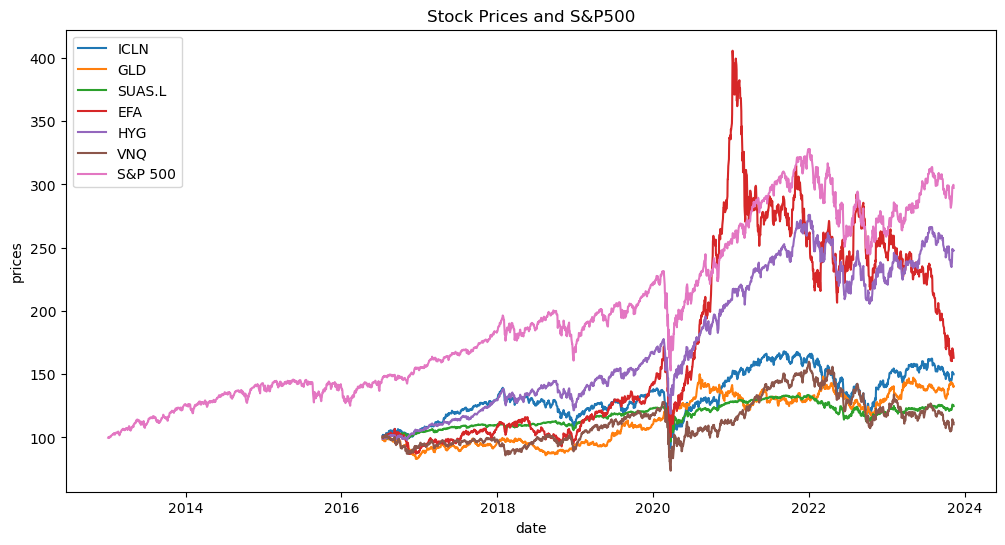

In [26]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# plotting the points
plt.plot(Prices_Base100, label=(ticker))
plt.plot(SP500_Base100, label='S&P 500')

# naming the x axis
plt.xlabel('date')
# naming the y axis
plt.ylabel('prices')

# giving a title to my graph
plt.title('Stock Prices and S&P500')

# Adding legends based on column names in the DataFrame
plt.legend()


# function to show the plot
plt.show()

## **Ahora Calcularemos tanto la Matriz de Correlaciones como la Matriz de Varianza-Covarianza**

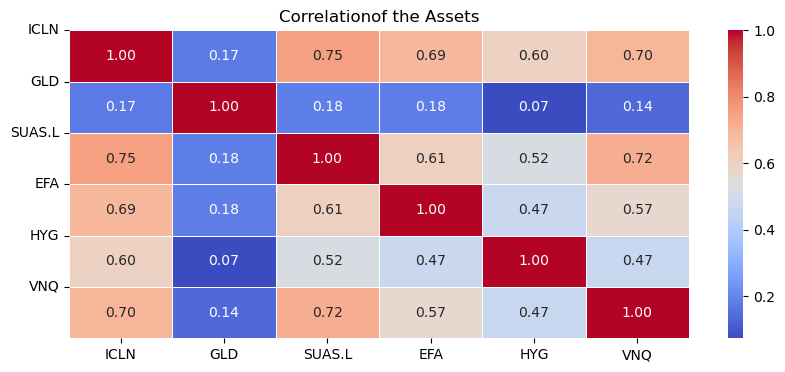


Matrix Variance-Covariance (Annual)
            ICLN       GLD    SUAS.L       EFA       HYG       VNQ
ICLN    0.029863  0.004063  0.011733  0.032494  0.017887  0.026296
GLD     0.004063  0.018123  0.002235  0.006637  0.001719  0.003995
SUAS.L  0.011733  0.002235  0.008124  0.015023  0.007983  0.014167
EFA     0.032494  0.006637  0.015023  0.075118  0.022277  0.034282
HYG     0.017887  0.001719  0.007983  0.022277  0.029453  0.017492
VNQ     0.026296  0.003995  0.014167  0.034282  0.017492  0.047498


In [27]:
Mat_Correlaciones = returns_data.corr()

import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(Mat_Correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.xticks(
    ticks=np.arange(0.5, len(ticker), 1),
    labels=ticker,
    rotation=0,
    ha='center')

plt.yticks(range(len(ticker)), ticker, rotation=0)

plt.title('Correlationof the Assets')
plt.show()

print()
print('Matrix Variance-Covariance (Annual)')
Mat_Var_Covar = returns_data.cov()*252
print(Mat_Var_Covar)


## **Ahora vamos a calcular el retorno y varianza de un portafolio de pesos iguales (Equally Weighted)**

In [28]:
num_assets = len(ticker)
W_equal = np.ones(num_assets)/num_assets
print(W_equal)
print(Assets_Returns)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Date
2016-07-12   -0.183203
2016-07-13   -0.145376
2016-07-14    0.402333
2016-07-15   -0.706568
2016-07-18    0.516890
                ...   
2023-11-03    3.920529
2023-11-06   -2.161202
2023-11-07   -0.869042
2023-11-08   -1.021840
2023-11-09   -1.200173
Length: 1888, dtype: float64


In [29]:
print('Return of an Equally Weighted Portfolio')
Return_Equally_Weighted = np.dot(W_equal, Assets_Returns)
print(f"{Return_Equally_Weighted}")

print()

print('Variance of an Equally Weighted Portfolio')
Variance_Equally_Weighted = np.dot(np.dot(W_equal, Mat_Var_Covar), W_equal.T)
print(f"{Variance_Equally_Weighted:.2%}")

print()

print('Sharpe Ratio of an Equally Weighted Portfolio')
SR_Equally_Weighted = (Return_Equally_Weighted - risk_free_asset) / np.sqrt(Variance_Equally_Weighted)
print(f"{SR_Equally_Weighted:.2}")

Return of an Equally Weighted Portfolio


ValueError: shapes (6,) and (1888,) not aligned: 6 (dim 0) != 1888 (dim 0)

## **A continuación simulamos muchos vectores W y para cada uno, calculamos el retorno del portafolio de riesgo, su desviación estándar y el Ratio de Sharpe**

In [13]:
# Simulating 100000 portfolios
num_port = 200000

# Creating an empty array to store portfolio weights
all_weights = np.zeros((num_port, len(ticker)))

# Creating an empty array to store portfolio returns
returns = np.zeros((num_port))

# Creating an empty array to store portfolio risks
stand_dev = np.zeros((num_port))

# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

# Lets run the for loop.
for i in range(num_port):
  weights = np.array(np.random.random(num_assets))
  weights = weights/np.sum(weights)

  # saving weights in the array
  all_weights[i,:] = weights

  # Saving Portfolio returns
  returns[i] = np.dot(weights, Assets_Returns)

  # Portfolio Risk
  stand_dev[i]= np.sqrt(np.dot(np.dot(weights, Mat_Var_Covar), weights.T))

  # Portfolio Sharpe Ratio
  sharpe_ratio[i] = (returns[i] - risk_free_asset) / stand_dev[i]


## **Seguidamente vamos a seleccionar el portafolio que tenga el máximo Ratio de Sharpe y ese será el portafolio óptimo**

      optimal weight
JPM         0.303967
AAPL        0.101685
WMT         0.016029
TGT         0.081794
MSFT        0.008896
AMZN        0.014560
META        0.279737
JNJ         0.012726
PG          0.029836
DIS         0.150770

Sharpe Ratio Óptimo = 0.9145617262087433

JPM     0.862746
AAPL    0.624584
WMT     0.077857
TGT     0.331750
MSFT    0.424643
AMZN    0.527279
META    0.907097
JNJ     0.366199
PG      0.378519
DIS     0.330832
dtype: float64


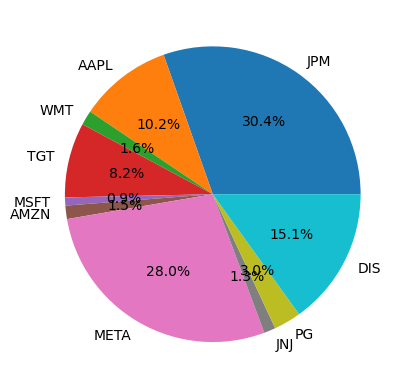

In [16]:
sharpe_ratio.max()

sharpe_ratio.argmax()

optimal_weights = all_weights[sharpe_ratio.argmax(),:]

return_optimal_portfolio = returns[sharpe_ratio.argmax()]

std_dev_optimal_portfolio = stand_dev[sharpe_ratio.argmax()]

df = pd.DataFrame(optimal_weights, columns=['optimal weight'], index=ticker)

print(df)
print()
print(f'Sharpe Ratio Óptimo = {sharpe_ratio.max()}')
print()
print(Sharpe_Ratios_Assets)

plt.pie(optimal_weights, labels=ticker, autopct='%1.1f%%')

plt.show()


## **Ahora vamos a graficar todos los portafolios simulados**

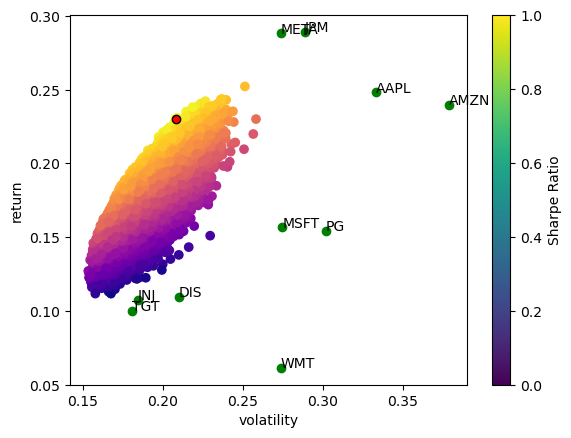

In [18]:
plt.scatter(stand_dev, returns, c=sharpe_ratio, cmap='plasma')
plt.scatter(Assets_Std, Assets_Returns, c='green')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('return')

labels = ticker
for i, label in enumerate(labels):
    plt.text(Assets_Std[i], Assets_Returns[i], label)

plt.scatter(std_dev_optimal_portfolio, return_optimal_portfolio, c='red', edgecolors='black')